# Soubory se záznamem z holteru

Užitečný se jeví zejména formát WFDB (.hea/.dat), který obsahuje záznam 3 svodů ECG.

In [50]:
from matplotlib import pyplot as plt
import pprint
import numpy as np

# Formát .mat

Formát pro práci v Matlabu. V souboru s příponou `.mat` se nachází metadata o pořízeném záznamu - Datum, čas, název. Nejsou zde obsaženy žádné záznamy s průběhem ECG. Položka *PEVENT* obsahuje 7 čísel s neznámým významem. 

In [1]:
import scipy.io
mat = scipy.io.loadmat('_.mat')

In [32]:
pprint.pprint(mat)

{'ExpLength': array([[ 1,  4, 43]], dtype=int16),
 'PEVENT': array([[3832.88 , 3838.648, 3840.52 , 3843.304, 3863.812, 3869.252,
        3878.936]]),
 'PatID': array(['hokus'], dtype='<U5'),
 'Starttime': array([[2022,    1,   31,   13,   45,    8]], dtype=int16),
 'beatpos': array([[7.640000e-01, 1.828000e+00, 2.872000e+00, ..., 3.881175e+03,
        3.882238e+03, 3.883293e+03]]),
 'beats': array([[2., 2., 2., ..., 2., 2., 2.]])}


In [7]:
beatpos = mat['beatpos']
len(beatpos[0])

3681

In [9]:

len(mat['PEVENT'][0])

7

In [10]:
len(mat['beats'][0])

3681

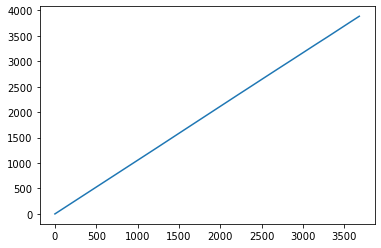

In [27]:
plt.plot(beatpos[0])

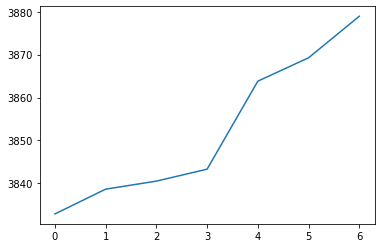

In [33]:
plt.plot(mat['PEVENT'][0])

# Soubory Physiobank WFDB (.hea/.dat)

Formát obsahuje záznamy ECG. Testovací soubor obsahuje záznamy ze 3 svodů. Načítáme prvních 5 sekund, aby bylo na obrázku něco vidět. Předpokládám, že 'fs' znamená frekvenci měření.

https://archive.physionet.org/physiotools/wfdb.shtml

https://github.com/MIT-LCP/wfdb-python


## Instalace balíky pro python

```shell
pip install wfdb
```

## Vizualizace prvních 5 sekund

In [146]:
import wfdb
fn = "_"
from wfdb import processing
sig, fields = wfdb.rdsamp(fn, channels=None, sampto=None)
# sig, fields = wfdb.rdsamp(fn, channels=None, sampto=5500)
fields

{'fs': 1000,
 'sig_len': 3883936,
 'n_sig': 3,
 'base_date': datetime.date(2022, 1, 31),
 'base_time': datetime.time(13, 45, 8),
 'units': ['mV', 'mV', 'mV'],
 'sig_name': ['EKG [1]', 'EKG [2]', 'EKG [3]'],
 'comments': []}

In [127]:
sig

array([[-6.51562158, -6.51813843, -6.55211401],
       [ 5.84533984,  5.86481226,  5.86082202],
       [-6.48542871, -6.48789185, -6.52179419],
       ...,
       [-0.56460669, -0.42042749, -0.53362891],
       [-0.56460669, -0.42042749, -0.53362891],
       [-0.56460669, -0.42042749, -0.53362891]])

In [128]:
# remove noisy signal at the beginning
sig = sig[300:]
# cut 5 seconds
sig = sig[:5000]

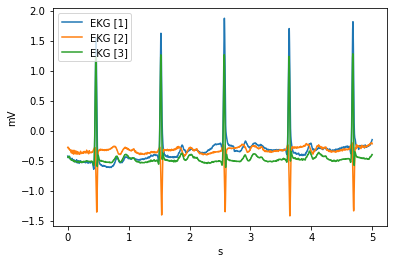

In [129]:
time = np.array(range(len(sig)))*1/fields['fs']
plt.plot(time, sig)
plt.legend(fields['sig_name'])
plt.ylabel(fields['units'][0])
plt.xlabel('s')
plt.savefig("ekg.png")

## Matlab export

In [144]:
sig, fields = wfdb.rdsamp(fn, channels=None, sampto=10000)
fields['sig'] = sig
tm = fields['base_time']
dt = fields['base_date']
fields['base_time'] = [tm.hour, tm.minute, tm.second]
fields['base_date'] = [dt.year, dt.month, dt.day]
scipy.io.savemat(fn + 'wfdb_export.mat',fields)

In [145]:
# Kontrola uložení znovu-načtením
scipy.io.loadmat(fn + 'wfdb_export.mat')

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Feb 10 16:23:20 2022',
 '__version__': '1.0',
 '__globals__': [],
 'fs': array([[1000]]),
 'sig_len': array([[10000]]),
 'n_sig': array([[3]]),
 'base_date': array([[2022,    1,   31]]),
 'base_time': array([[13, 45,  8]]),
 'units': array(['mV', 'mV', 'mV'], dtype='<U2'),
 'sig_name': array(['EKG [1]', 'EKG [2]', 'EKG [3]'], dtype='<U7'),
 'comments': array([], shape=(0, 0), dtype=float64),
 'sig': array([[-6.51562158, -6.51813843, -6.55211401],
        [ 5.84533984,  5.86481226,  5.86082202],
        [-6.48542871, -6.48789185, -6.52179419],
        ...,
        [-0.14190649, -0.34481104, -0.4487334 ],
        [-0.14190649, -0.34783569, -0.4487334 ],
        [-0.14492578, -0.34783569, -0.4487334 ]])}